## My Neural Network Implementation

**Currently supported**:
- *HE* weights initialization
- Multiple *Dense* Layers
- *Sigmoid* Activation Function
- *Mini-Batch Gradient Descent*
- MSE Error function

**Backlog**:
- Agnostic Error and Activation Functions
- *Gradient checking*
- Validation set evaluation during training
- History containing epochs-related changes on validation error and other attributes
- Input data validation
- Automatic differentiation/backpropagation for different Error and Activation Functions
- *Stochastic Batch Gradient Descent*
- Dropout
- Early Stopping
- Different Initialization methods (*Xavier, Standard*)
- *RNN* and *LSTM* Layers

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.datasets import make_blobs

from neuralnet import NeuralNet

### Get Data

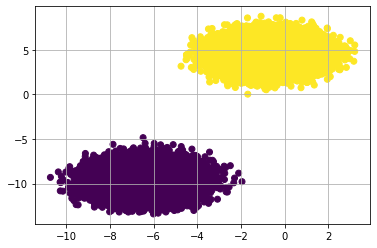

In [2]:
X, y = make_blobs(100000, centers=2, n_features=2, random_state=11)
plt.scatter(X[:, 0], X[:, 1], c=y)
plt.grid(True)
plt.show()

### Define Dense Hidden Layers Architecture

In [3]:
dense_layers = [
    (2, 120),
    (120, 1)
]
nn = NeuralNet(layer_shapes=dense_layers)

[(3, 120), (121, 1)]


### Split Train and Test set and optimize the neural network weights

In [4]:
from sklearn.model_selection import train_test_split
Xtrain, Xtest, Ytrain, Ytest = train_test_split(X, y, test_size=0.33, random_state=10)

In [5]:
nn.train(Xtrain, Ytrain, 5, 64, 1e-4)

Epoch 0 | Error: -0.000802 | WV0: 0.005943 | WV1: -5.412723
Epoch 1 | Error: -9.7e-05 | WV0: -0.016891 | WV1: -4.439573
Epoch 2 | Error: 0.000491 | WV0: -0.031056 | WV1: -3.545245
Epoch 3 | Error: 0.000826 | WV0: -0.038744 | WV1: -2.852197
Epoch 4 | Error: 0.000957 | WV0: -0.042303 | WV1: -2.348945


### Evaluate Precision on Test Set

In [6]:
forwards = nn.compute_forward_propagation(Xtest)
ypred = np.around(forwards[-1])
precision = (ypred == Ytest.reshape(-1,1)).mean()
print(f"Precission: {round(precision, 2) * 100}%")

Precission: 100.0%


### Evaluate Precision on Train Set

In [7]:
train_forwards = nn.compute_forward_propagation(Xtrain)
ytrain_pred = np.around(train_forwards[-1])
precision = (ytrain_pred == Ytrain.reshape(-1,1)).mean()
print(f"Precission: {round(precision, 2) * 100}%")

Precission: 100.0%


# More Complex Dataset

In [8]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.datasets import make_classification, make_circles
from neuralnet import NeuralNet

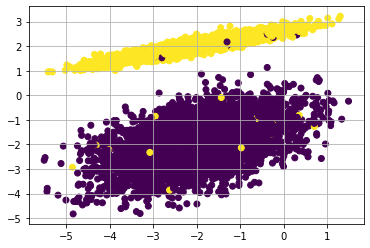

In [9]:
#X, y = make_circles(100000, shuffle=True, noise=0.50, factor=0.)
X, y = make_classification(10000, n_features=2, n_informative=2, n_redundant=0, 
                           class_sep=2, n_clusters_per_class=1)
plt.scatter(X[:, 0], X[:, 1], c=y)
plt.grid(True)
plt.show()

In [10]:
dense_layers = [
    (2, 150),
    (150, 100),
    (100, 1)
]
nn = NeuralNet(layer_shapes=dense_layers)

[(3, 150), (151, 100), (101, 1)]


In [11]:
from sklearn.model_selection import train_test_split
Xtrain, Xtest, Ytrain, Ytest = train_test_split(X, y, test_size=0.33, random_state=10)

In [12]:
nn.train(Xtrain, Ytrain, 10, 64, 5e-3)

Epoch 0 | Error: -0.037446 | WV0: 0.000113 | WV1: 0.004078
Epoch 1 | Error: -0.006727 | WV0: -0.001577 | WV1: -0.000182
Epoch 2 | Error: 2.2e-05 | WV0: -0.001963 | WV1: -8.7e-05
Epoch 3 | Error: 0.000294 | WV0: -0.001994 | WV1: -7.9e-05
Epoch 4 | Error: 0.000219 | WV0: -0.002009 | WV1: -8.5e-05
Epoch 5 | Error: 0.000178 | WV0: -0.002022 | WV1: -9e-05
Epoch 6 | Error: 0.000165 | WV0: -0.002037 | WV1: -9.3e-05
Epoch 7 | Error: 0.000145 | WV0: -0.002049 | WV1: -9.6e-05
Epoch 8 | Error: 0.000292 | WV0: -0.002061 | WV1: -9.3e-05
Epoch 9 | Error: 0.000118 | WV0: -0.002062 | WV1: -0.000102


In [13]:
train_forwards = nn.compute_forward_propagation(Xtrain)
ytrain_pred = np.around(train_forwards[-1])
precision = (ytrain_pred == Ytrain.reshape(-1,1)).mean()
print(f"Precission on Training Set: {round(precision, 2) * 100}%")

Precission on Training Set: 99.0%


In [14]:
forwards = nn.compute_forward_propagation(Xtest)
ypred = np.around(forwards[-1])
precision = (ypred == Ytest.reshape(-1,1)).mean()
print(f"Precission on Test set: {round(precision, 2) * 100}%")

Precission on Test set: 99.0%


## Circles Dataset

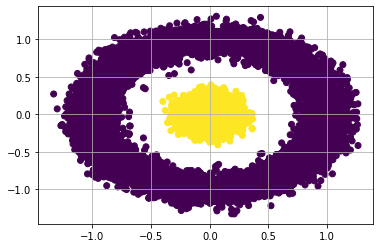

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.datasets import make_classification, make_circles
from neuralnet import NeuralNet

X, y = make_circles(20000, shuffle=True, noise=0.1, factor=0.05)
plt.scatter(X[:, 0], X[:, 1], c=y)
plt.grid(True)
plt.show()

In [2]:
X_ = np.hstack([X, np.power(X, 2)])

In [4]:
dense_layers = [
    (4, 10),
    (10, 10),
    (10, 1)
]

nn = NeuralNet(layer_shapes=dense_layers)

from sklearn.model_selection import train_test_split
Xtrain, Xtest, Ytrain, Ytest = train_test_split(X_, y, test_size=0.33, random_state=10)

nn.train(Xtrain, Ytrain, 2000, 64, 0.003)

[(5, 10), (11, 10), (11, 1)]
Epoch 0 | Error: 0.029871736 | WV0: -0.008278864 | WV1: -0.015502811
Epoch 1 | Error: 0.012959817 | WV0: -0.008337688 | WV1: -0.012722489
Epoch 2 | Error: 0.005369834 | WV0: -0.008371598 | WV1: -0.00839616
Epoch 3 | Error: 0.002460863 | WV0: -0.008434076 | WV1: -0.006284801
Epoch 4 | Error: 0.001577529 | WV0: -0.008532923 | WV1: -0.005626314
Epoch 5 | Error: 0.000700934 | WV0: -0.008610038 | WV1: -0.004897367
Epoch 6 | Error: 0.000817051 | WV0: -0.008730888 | WV1: -0.005018349
Epoch 7 | Error: 0.000121869 | WV0: -0.008832109 | WV1: -0.004392181
Epoch 8 | Error: 7.2621e-05 | WV0: -0.008930615 | WV1: -0.004333701
Epoch 9 | Error: 0.000174723 | WV0: -0.00902843 | WV1: -0.004413895
Epoch 10 | Error: 0.000216345 | WV0: -0.009144282 | WV1: -0.004432175
Epoch 11 | Error: 0.000485534 | WV0: -0.009260367 | WV1: -0.004666233
Epoch 12 | Error: 0.00047474 | WV0: -0.009376975 | WV1: -0.00465675
Epoch 13 | Error: 0.000347608 | WV0: -0.0094771 | WV1: -0.00454543
Epoch 14 

In [5]:
train_forwards = nn.compute_forward_propagation(Xtrain)
ytrain_pred = np.around(train_forwards[-1])
precision = (ytrain_pred == Ytrain.reshape(-1,1)).mean()
print(f"Precission on Training Set: {round(precision, 2) * 100}%")

forwards = nn.compute_forward_propagation(Xtest)
ypred = np.around(forwards[-1])
precision = (ypred == Ytest.reshape(-1,1)).mean()
print(f"Precission on Test set: {round(precision, 2) * 100}%")

Precission on Training Set: 100.0%
Precission on Test set: 100.0%


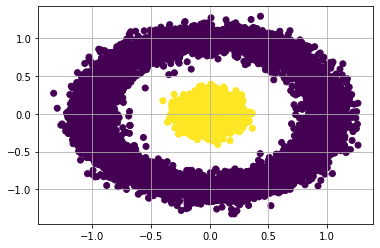

In [6]:
plt.scatter(Xtrain[:, 0], Xtrain[:, 1], c=ytrain_pred)
plt.grid(True)
plt.show()